Project 1: Predicting Minnesota Housing Prices

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Excel file)
housing = pd.read_excel("housing_data.xlsx")

# Preview first rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,school_quality_index,distance_to_highway,property_tax_rate,climate_zone
0,-120.589617,34.282101,28,3896,3925,792,1181,14.780423,135269,3.287326,10.833035,2.761813,Coastal
1,-114.804828,37.639288,7,334,1660,4450,717,6.370885,303765,8.426214,13.839397,0.831183,Coastal
2,-117.000781,40.754420,35,9220,2973,1578,2691,11.663441,453185,5.367300,4.438709,1.903407,Urban
3,-118.339469,39.430236,28,3707,3932,356,2686,8.250458,348113,5.890653,1.914753,0.712615,Urban
4,-122.783573,40.129740,14,8143,3271,2530,2582,3.225460,475665,3.742848,23.374581,2.294547,Urban


In [12]:
# Basic information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             1000 non-null   float64
 1   latitude              1000 non-null   float64
 2   housing_median_age    1000 non-null   int64  
 3   total_rooms           1000 non-null   int64  
 4   total_bedrooms        1000 non-null   int64  
 5   population            1000 non-null   int64  
 6   households            1000 non-null   int64  
 7   median_income         1000 non-null   float64
 8   median_house_value    1000 non-null   int64  
 9   school_quality_index  1000 non-null   float64
 10  distance_to_highway   1000 non-null   float64
 11  property_tax_rate     1000 non-null   float64
 12  climate_zone          1000 non-null   object 
dtypes: float64(6), int64(6), object(1)
memory usage: 101.7+ KB


In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,school_quality_index,distance_to_highway,property_tax_rate
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.427824,37.311033,26.30200,4882.216000,2569.404000,2511.944000,1519.046000,8.259397,276480.167000,5.334053,15.084126,1.982868
std,2.933059,2.749507,14.71684,2795.824773,1458.087073,1407.628479,859.278039,3.889959,127902.205735,2.551674,8.266568,0.864057
min,-124.303494,32.570284,1.00000,102.000000,61.000000,101.000000,63.000000,1.508471,50037.000000,1.002186,0.501558,0.500723
25%,-121.980828,34.808509,14.00000,2665.750000,1281.500000,1280.000000,797.000000,4.977093,170603.500000,3.120643,8.278150,1.227175
50%,-119.362054,37.421286,26.00000,4648.500000,2552.500000,2522.500000,1484.500000,8.371792,276961.500000,5.268575,15.086319,1.980514
75%,-116.877031,39.695976,39.00000,7317.000000,3907.250000,3667.500000,2301.000000,11.423613,387379.500000,7.427676,21.883981,2.726181
max,-114.312835,41.944483,51.00000,9997.000000,4997.000000,4997.000000,2994.000000,14.997965,499170.000000,9.990142,29.959211,3.498516


In [14]:
# Check for missing values
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
school_quality_index,0


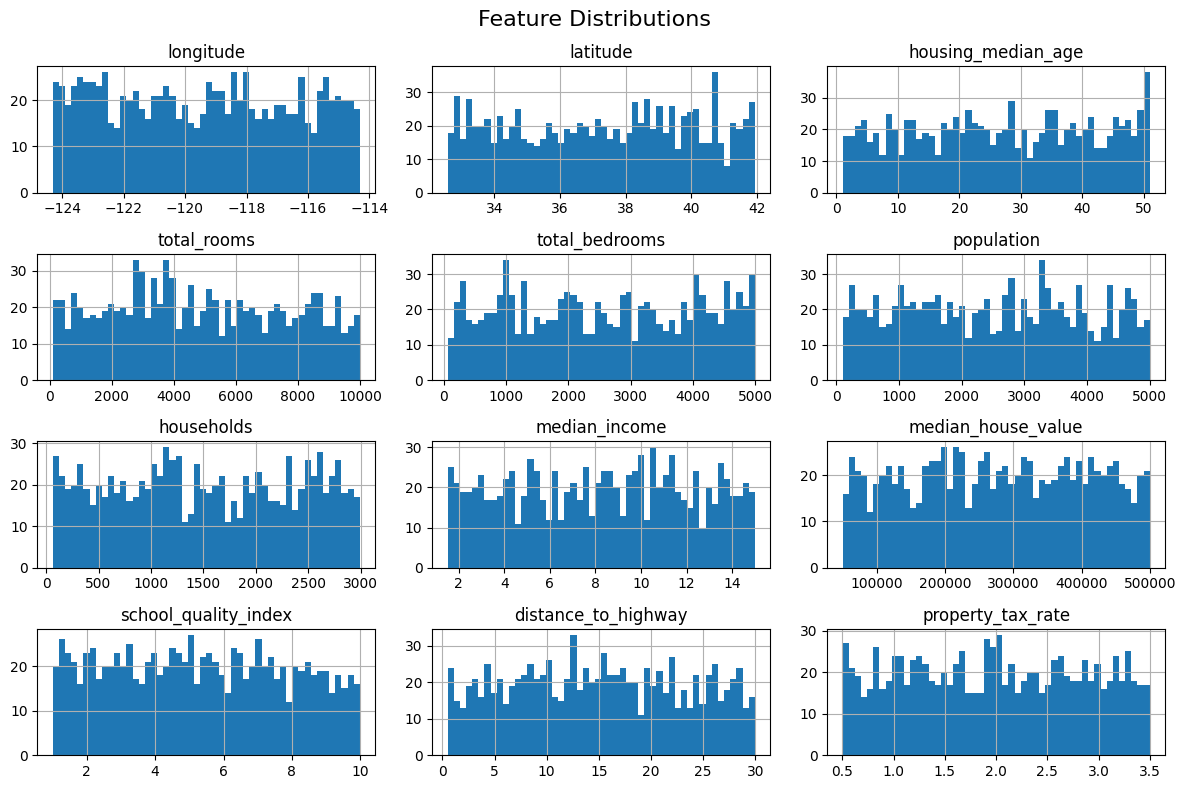

In [15]:
housing.hist(bins=50, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
# Create new ratio-based features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Convert categorical feature into dummy variables
housing = pd.get_dummies(housing, columns=["climate_zone"], drop_first=True)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,school_quality_index,distance_to_highway,property_tax_rate,rooms_per_household,bedrooms_per_room,population_per_household,climate_zone_Desert,climate_zone_Mountain,climate_zone_Urban
0,-120.589617,34.282101,28,3896,3925,792,1181,14.780423,135269,3.287326,10.833035,2.761813,3.298899,1.007444,0.670618,False,False,False
1,-114.804828,37.639288,7,334,1660,4450,717,6.370885,303765,8.426214,13.839397,0.831183,0.465830,4.970060,6.206416,False,False,False
2,-117.000781,40.754420,35,9220,2973,1578,2691,11.663441,453185,5.367300,4.438709,1.903407,3.426236,0.322451,0.586399,False,False,True
3,-118.339469,39.430236,28,3707,3932,356,2686,8.250458,348113,5.890653,1.914753,0.712615,1.380119,1.060696,0.132539,False,False,True
4,-122.783573,40.129740,14,8143,3271,2530,2582,3.225460,475665,3.742848,23.374581,2.294547,3.153757,0.401695,0.979861,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 17)
Testing set shape: (200, 17)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Train models
lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# Evaluate using RMSE
def rmse(model):
    pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, pred))

print("Linear Regression RMSE:", rmse(lin_reg))
print("Decision Tree RMSE:", rmse(tree_reg))
print("Random Forest RMSE:", rmse(forest_reg))

Linear Regression RMSE: 127529.72795458973
Decision Tree RMSE: 186185.17191817396
Random Forest RMSE: 129983.52462994694


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)

print("Cross-validation RMSEs:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())
print("Standard Deviation:", forest_rmse_scores.std())

Cross-validation RMSEs: [136478.42863664 130166.36345553 134680.79407251 132681.17766362
 126191.59129536]
Mean RMSE: 132039.67102472944
Standard Deviation: 3599.97079511533


In [20]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    "n_estimators": [60, 120, 240],
    "max_features": [6, 8, 10],
    "max_depth": [None, 12, 20],
    "min_samples_split": [2, 5]
}

halving = HalvingGridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=3,
    factor=2,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

halving.fit(X_train, y_train)
print("Best parameters:", halving.best_params_)
print("Best CV RMSE:", np.sqrt(-halving.best_score_))

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 25
max_resources_: 800
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 54
n_resources: 25
Fitting 3 folds for each of 54 candidates, totalling 162 fits
----------
iter: 1
n_candidates: 27
n_resources: 50
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 2
n_candidates: 14
n_resources: 100
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 7
n_resources: 200
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 4
n_candidates: 4
n_resources: 400
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 5
n_candidates: 2
n_resources: 800
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'max_depth': None, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 120}
Best CV RMSE: 130105.61111416895


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

final_model = halving.best_estimator_
y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

RMSE: 130802.53, MAE: 112874.70, R²: -0.0642


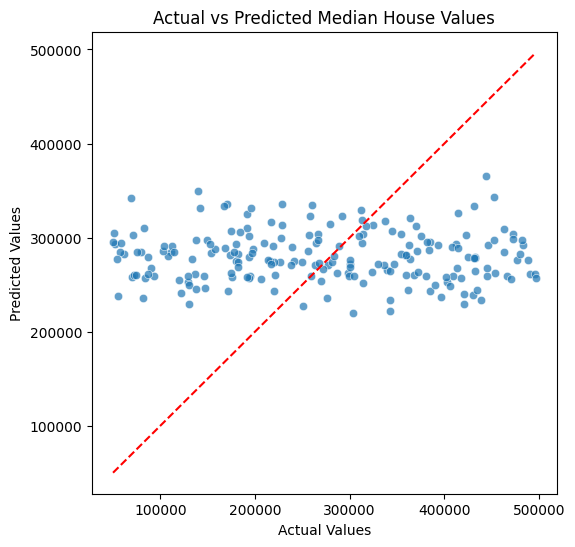

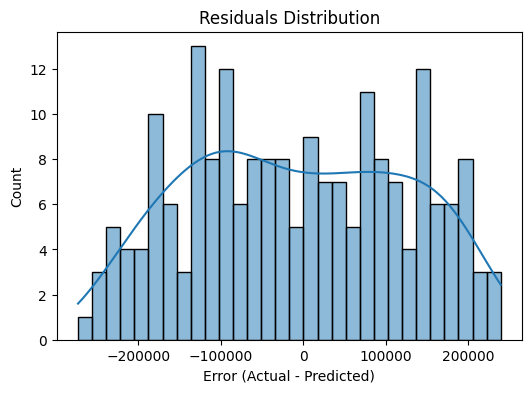

In [22]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Values")
plt.show()

# Residual Distribution
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

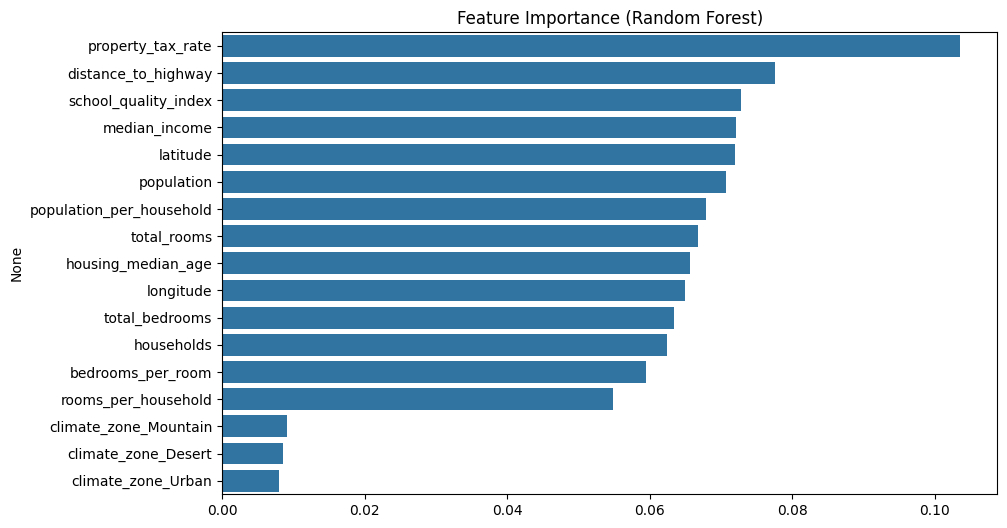

In [23]:
importances = final_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.show()

In [24]:
import joblib
joblib.dump(final_model, "final_housing_model.pkl")
print("Model saved as final_housing_model.pkl")

Model saved as final_housing_model.pkl
